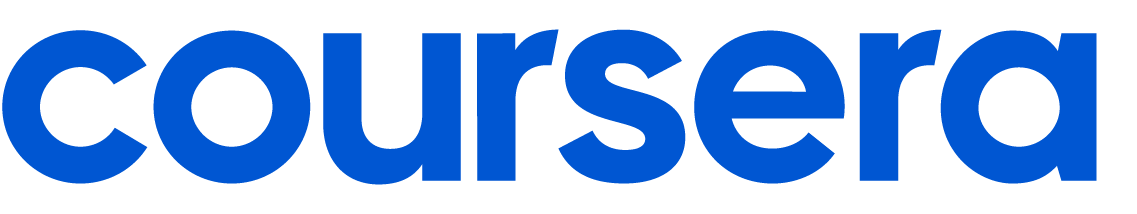

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to **tackle one of the most industry-relevant maching learning problems** with a unique dataset that will put your modeling skills to the test. ***Subscription services*** are leveraged by companies across many industries, from *fitness* to video streaming to *retail*. One of the primary objectives of companies with subscription services is to **decrease churn and ensure that users are retained as subscribers**. In order to do this efficiently and systematically, many companies employ machine learning to *predict* which users are at **the highest risk of churn**, so that **proper interventions** can be effectively deployed to the right audience.

In this challenge, we will be tackling the **churn prediction problem on a very unique and interesting group of subscribers** on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:

* the customer **completes all content they were interested in, and no longer need the subscription**

* the customer finds themselves to **be too busy and cancels their subscription until a later time**

* the customer **determines that the streaming service is not the best fit for them**, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to **two datasets that are samples of past subscriptions** of a video streaming platform that contain information about 

- **the customer, the customers streaming preferences, and their activity in the subscription** thus far. 

- One dataset is titled `train.csv` and the other is titled `test.csv`.

- `train.csv` contains 70% of the overall sample (***243,787 subscriptions to be exact***) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

- The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (**104,480 subscriptions to be exact**), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, **a single observation (`CustomerID`)** is included during which the subscription was active. --> no duiplicates

In addition to this identifier column, the `train.csv` dataset also contains **the target label for the task**, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [4]:
import pandas as pd
data_descriptions = pd.read_csv('/Users/longhoachung/anaconda_projects/Challenges/Streaming service/data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions


,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


#### Attentions:
Which columns we need and then the index? Based upon this hint

* the customer: Age, Gender, Genre Preference, WatchlistSize, Parental Control, UserRating

* the customers streaming preferences: TotalCharges, SubscriptionType, ContentType, MultipleDeviceAccess, PaperlessBilling, SubtitlesEnabled

* and their activity in the subscription:DeviceRegistered, ViewingHoursPerWeek, AverageViewingDuration, SupportTicketsPerMonth, Churn	


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below 
1. to explore the data, train a model using the data in `train.csv`, and 
2. then score your model using the data in `test.csv`. 

Your final submission should be a **dataframe** (call it ***`prediction_df`*** with ***two columns*** and exactly **104,480 rows (plus a header row)**. 

- The *first column* should be ***`CustomerID`*** so that we know which prediction belongs to which observation.

- The *second column* should be called ***`predicted_probability`*** and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and **columns are critical for our autograding**, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).

We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

**Notes:** I expanded the the module Scipy and keras to know what the libraries functions

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

1. pandas
2. numpy
3. Scipy: 
```
        - scipy.optimize: For optimization algorithms.
        - scipy.integrate: For integration routines.
        - scipy.interpolate: For interpolation techniques.
        - scipy.stats: For sta
        
 ```
 
   
        
4. Scikit-learn

5. keras
```
        - model = keras.Sequential()
        - model.add(keras.layers.Dense(units=, activation='relu', input_shape=(input_dim,)))
        - model.add(keras.layers.Dense(units=, activation='softmax'))
        - model.fit(x_train, y_train, epochs=, batch_size=)
```

6. maplotlib

7. seaborn
- etc, etc
 

In [7]:
# Package installation (uncomment if needed)
# import sys
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install scikit-learn

# Data manipulation and analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

# Visualization setup
%matplotlib inline

In [8]:
# Import any other packages you may want to use 

# Import #3 SciPy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Fixed import statement
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

# Install and Import keras #5


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [9]:
train_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Streaming service/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(10)

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


In [10]:
test_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Streaming service/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(10)

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR
5,5,19.037169,95.185843,Basic,Electronic check,Yes,Movies,Yes,Tablet,35.058340,62.351472,1,Comedy,1.695250,1,Male,6,Yes,No,7A88BB5IO6
6,103,9.135067,940.911867,Standard,Credit card,No,Both,Yes,Computer,6.237829,120.736176,9,Sci-Fi,3.912529,4,Male,22,Yes,No,70OMW9XEWR
7,22,7.069956,155.539038,Basic,Electronic check,No,Both,Yes,Computer,6.372862,111.135950,35,Fantasy,2.488022,9,Female,7,No,No,EL1RMFMPYL
8,21,6.615587,138.927320,Standard,Electronic check,Yes,Both,Yes,Mobile,18.564468,37.712931,44,Fantasy,3.425709,5,Female,8,No,Yes,4IA2QPT6ZK
9,86,11.439289,983.778885,Standard,Credit card,Yes,Movies,No,Tablet,27.467128,17.324508,19,Sci-Fi,1.772171,9,Male,3,No,No,AEDCWHSJDN


### Comments:
- The output confirms the succesful import of two datasets, with their exact numbers of rows: 243787 for the train_df and 104480 for the test_df
- As the Ground truth is not provided in the test_df, the Churn column is missing. This can be confirmed further when called out all of the columns names.

## 
Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to 
- ***explore***, 
- ***clean***, 
- ***validate***, and 
- ***visualize*** the data 
however you see fit for this competition to help **determine or optimize your predictive model**

. Please note - the final autograding will only be **on the accuracy of the `prediction_df` predictions**

In [11]:

numerical_columns_train = train_df.select_dtypes(include=['float64','int64']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_train = train_df[numerical_columns_train]
print(df_num_train .shape)

numerical_columns_test = test_df.select_dtypes(include=['float64','int64']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_test = test_df[numerical_columns_test]
print(df_num_test .shape)



(243787, 10)
(104480, 9)


In [12]:
# side by side for each column in train_df and test_df
all_cols = set(train_df.columns).union(set(test_df.columns))

for col in all_cols:
    print(f"\nColumn: {col}")
    print("-" * 60)
    if col in train_df.columns and col in test_df.columns:
        desc_train = train_df[col].describe()
        desc_test = test_df[col].describe()
        summary = pd.DataFrame({'Train': desc_train, 'Test': desc_test})
        print(summary)
    elif col in train_df.columns:
        print("Only in train_df:")
        print(train_df[col].describe())
    elif col in test_df.columns:
        print("Only in test_df:")
        print(test_df[col].describe())



Column: UserRating
------------------------------------------------------------
               Train           Test
count  243787.000000  104480.000000
mean        3.002713       3.000958
std         1.155259       1.154689
min         1.000007       1.000016
25%         2.000853       2.000577
50%         3.002261       2.997293
75%         4.002157       4.000671
max         4.999989       4.999930

Column: Churn
------------------------------------------------------------
Only in train_df:
count    243787.000000
mean          0.181232
std           0.385211
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Churn, dtype: float64

Column: SubtitlesEnabled
------------------------------------------------------------
         Train    Test
count   243787  104480
unique       2       2
top        Yes     Yes
freq    122180   52259

Column: TotalCharges
------------------------------------------------------------
    

### Comments:
- Both datasets are dataframe structures with matching datatypes and columb Churning is not available in the test_df.

- The outputs show no count for non- null values, which is great.

- The data type of each column makes sense and consistent between the two datasets. All of the numeric columns are in eiher int64 or float64 kinds.

-There are 11 columns with object type, which is differnt from the data_descriptions output that shows only one 1 object datatype as in 'SubscriptionType'. 

- The othe 10 columns wer orginnaly identifed as string type instead.

- The 'Churn' column is of int64, 0 and 1, 0 as 'False' value and 1 = 'True'.

- Categorical values for SubscriptionType, PaymentMethod, ContentType, DeviceRegistered, GenrePreference and Gender

- Boolean values for PaperlessBilling, MultiDeviceAccess, ParentalControl, SubtitlesEnabled

- The most common values are different in several variables: ParentControl, DeviceRegistered, MultipleDevice, GenrePreference, PaymentMethod and SubscriptionType

### DataType

In [13]:
# Compare dtypes between train and test datasets
dtypes_comparison = pd.DataFrame({
    'Train dtypes': train_df.dtypes,
    'Test dtypes': test_df.dtypes
})

# Add a column to flag any differences
dtypes_comparison['Match'] = dtypes_comparison['Train dtypes'] == dtypes_comparison['Test dtypes']

print("Data Types Comparison between Train and Test datasets:")
print("=" * 80)
print("\nSummary of matches:")
print(f"Total columns: {len(dtypes_comparison)}")
print(f"Matching dtypes: {dtypes_comparison['Match'].sum()}")
print(f"Mismatched dtypes: {(~dtypes_comparison['Match']).sum()}")
print("\nDetailed comparison:")
print(dtypes_comparison)

Data Types Comparison between Train and Test datasets:

Summary of matches:
Total columns: 21
Matching dtypes: 20
Mismatched dtypes: 1

Detailed comparison:
                         Train dtypes Test dtypes  Match
AccountAge                      int64       int64   True
AverageViewingDuration        float64     float64   True
Churn                           int64         NaN  False
ContentDownloadsPerMonth        int64       int64   True
ContentType                    object      object   True
CustomerID                     object      object   True
DeviceRegistered               object      object   True
Gender                         object      object   True
GenrePreference                object      object   True
MonthlyCharges                float64     float64   True
MultiDeviceAccess              object      object   True
PaperlessBilling               object      object   True
ParentalControl                object      object   True
PaymentMethod                  object      ob

In [14]:
# Get categorical columns, excluding CustomerID
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns = list(set([col for col in categorical_columns if col != 'CustomerID']))  # Using set to ensure uniqueness
categorical_columns.sort()  # Sort for consistent output order

# Function to analyze categorical variables
def compare_categorical_distributions(train_df, test_df, columns):
    """Compare categorical variable distributions between train and test sets, ignoring CustomerID"""
    print("Categorical Variables Analysis")
    print("=" * 80)
    
    for col in columns:
        print(f"\nColumn: {col}")
        print("-" * 40)
        
        # Get value counts
        train_counts = train_df[col].value_counts()
        test_counts = test_df[col].value_counts()
        
        # Create comparison DataFrame
        comparison = pd.DataFrame({
            'Train Count': train_counts,
            'Train %': (train_counts / len(train_df) * 100).round(2),
            'Test Count': test_counts,
            'Test %': (test_counts / len(test_df) * 100).round(2)
        })
        
        # Add missing values if any
        missing_in_train = set(test_counts.index) - set(train_counts.index)
        missing_in_test = set(train_counts.index) - set(test_counts.index)
        
        if missing_in_train or missing_in_test:
            print(f"⚠️ Warning: Distribution mismatch in {col}")
            if missing_in_train:
                print(f"Values in test but not in train: {missing_in_train}")
            if missing_in_test:
                print(f"Values in train but not in test: {missing_in_test}")
        
        print(f"\nUnique values - Train: {train_df[col].nunique()} | Test: {test_df[col].nunique()}")
        print("\nValue distributions:")
        print(comparison)
        print("\n" + "=" * 80)

# Run the analysis
compare_categorical_distributions(train_df, test_df, categorical_columns)

Categorical Variables Analysis

Column: ContentType
----------------------------------------

Unique values - Train: 3 | Test: 3

Value distributions:
             Train Count  Train %  Test Count  Test %
ContentType                                          
Both               81737    33.53       35087   33.58
Movies             80905    33.19       34848   33.35
TV Shows           81145    33.29       34545   33.06


Column: DeviceRegistered
----------------------------------------

Unique values - Train: 4 | Test: 4

Value distributions:
                  Train Count  Train %  Test Count  Test %
DeviceRegistered                                          
Computer                61147    25.08       25972   24.86
Mobile                  60914    24.99       26263   25.14
TV                      60583    24.85       25908   24.80
Tablet                  61143    25.08       26337   25.21


Column: Gender
----------------------------------------

Unique values - Train: 2 | Test: 2

Valu

***Notes***
- Both categorical and boolean variables are 'object'. 
- The good thing is that all values in these categorical and booolean variables are the same.

### Check for Missing Values (NaN)

In [15]:
# Function to analyze missing values
def analyze_missing_values(train_df, test_df):
    """Analyze missing values in both train and test datasets"""
    
    # Calculate missing values for both datasets
    train_missing = train_df.isnull().sum()
    test_missing = test_df.isnull().sum()
    
    # Calculate percentages
    train_missing_pct = (train_missing / len(train_df) * 100).round(2)
    test_missing_pct = (test_missing / len(test_df) * 100).round(2)
    
    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Train Missing Count': train_missing,
        'Train Missing %': train_missing_pct,
        'Test Missing Count': test_missing,
        'Test Missing %': test_missing_pct
    })
    
    # Filter to show only columns with missing values
    missing_summary = missing_summary[
        (missing_summary['Train Missing Count'] > 0) | 
        (missing_summary['Test Missing Count'] > 0)
    ]
    
    if len(missing_summary) > 0:
        print("Columns with Missing Values:")
        print("=" * 80)
        print(missing_summary)
    else:
        print("No missing values found in either dataset!")
        
    # Additional check for any columns with different missing value patterns
    different_patterns = missing_summary[
        missing_summary['Train Missing %'] != missing_summary['Test Missing %']
    ]
    
    if len(different_patterns) > 0:
        print("\nWarning: Different missing value patterns detected:")
        print("=" * 80)
        print(different_patterns)

# Run the analysis
analyze_missing_values(train_df, test_df)

No missing values found in either dataset!


### Distribution Analysis by Variable Types

#### Analyzing Numerical Variables

In [16]:
# Get all numerical columns except 'CustomerID' and 'Churn' (target)
numerical_cols = [col for col in train_df.select_dtypes(include=['float64', 'int64']).columns 
                 if col not in ['CustomerID', 'Churn']]

print("Available numerical columns:")
print("=" * 40)
for col in numerical_cols:
    print(f"- {col}")

print("\nGrouping columns into categories...")
print("=" * 40)

# Customer Demographics
demographics = [col for col in numerical_cols if col in [
    'Age', 'UserRating', 'AccountAge', 'WatchlistSize'
    # Add more if your dataset has them
]]

# Service Usage
service_usage = [col for col in numerical_cols if col in [
    'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth'
    # Add more if your dataset has them
]]

# Financial/Payment
financial = [col for col in numerical_cols if col in [
    'TotalCharges'
    # Add more if your dataset has them
]]

# Any remaining numerical columns go into other_metrics
other_metrics = [col for col in numerical_cols if col not in demographics + service_usage + financial]

print("\nCustomer Demographics:")
print("=" * 40)
for col in demographics:
    print(f"- {col}")

print("\nService Usage:")
print("=" * 40)
for col in service_usage:
    print(f"- {col}")

print("\nFinancial/Payment:")
print("=" * 40)
for col in financial:
    print(f"- {col}")

print("\nOther Metrics:")
print("=" * 40)
for col in other_metrics:
    print(f"- {col}")

Available numerical columns:
- AccountAge
- MonthlyCharges
- TotalCharges
- ViewingHoursPerWeek
- AverageViewingDuration
- ContentDownloadsPerMonth
- UserRating
- SupportTicketsPerMonth
- WatchlistSize

Grouping columns into categories...

Customer Demographics:
- AccountAge
- UserRating
- WatchlistSize

Service Usage:
- ViewingHoursPerWeek
- AverageViewingDuration
- ContentDownloadsPerMonth
- SupportTicketsPerMonth

Financial/Payment:
- TotalCharges

Other Metrics:
- MonthlyCharges


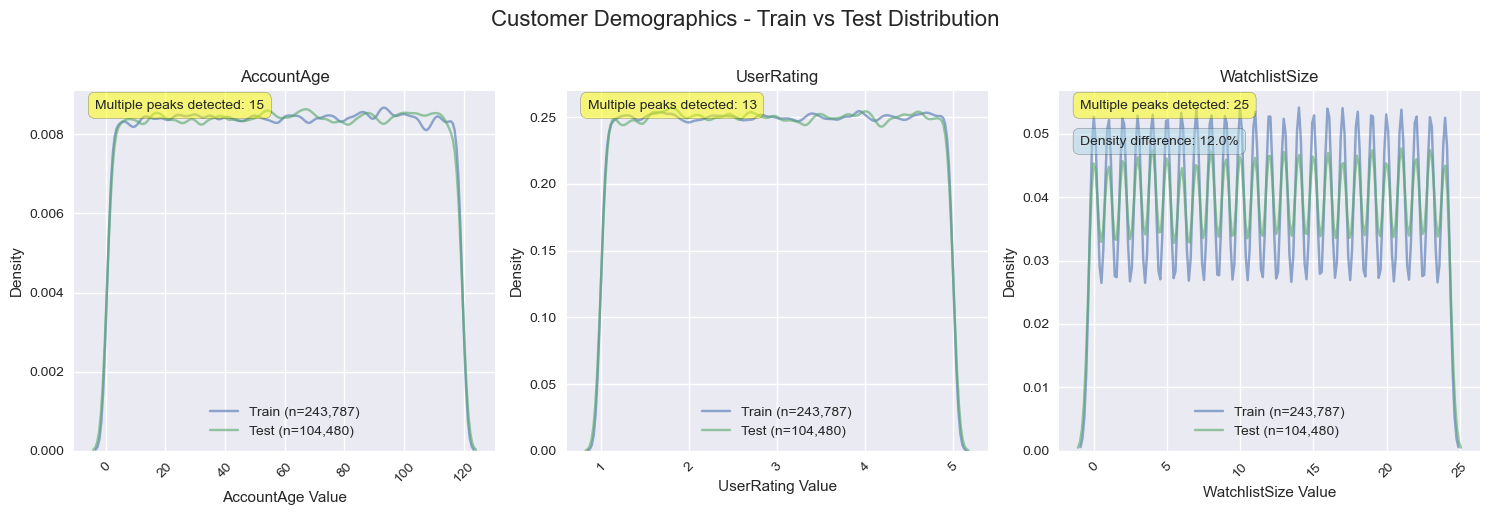


Customer Demographics Analysis:
----------------------------------------

AccountAge Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 60.08, Median: 60.00, Mode: 93.00
    Test  - Mean: 60.06, Median: 60.00, Mode: 55.00

  Multiple modes detected at approximately:
    - 15.82
    - 28.28
    - 50.22
    - 62.67
    - 74.53
    - 86.39
    - 93.50
    - 111.29

UserRating Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 3.00, Median: 3.00, Mode: 1.00
    Test  - Mean: 3.00, Median: 3.00, Mode: 1.00

  Multiple modes detected at approximately:
    - 1.32
    - 1.68
    - 2.37
    - 2.87
    - 3.41
    - 3.91
    - 4.28
    - 4.68

WatchlistSize Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 12.02, Median: 12.00, Mode: 16.00
    

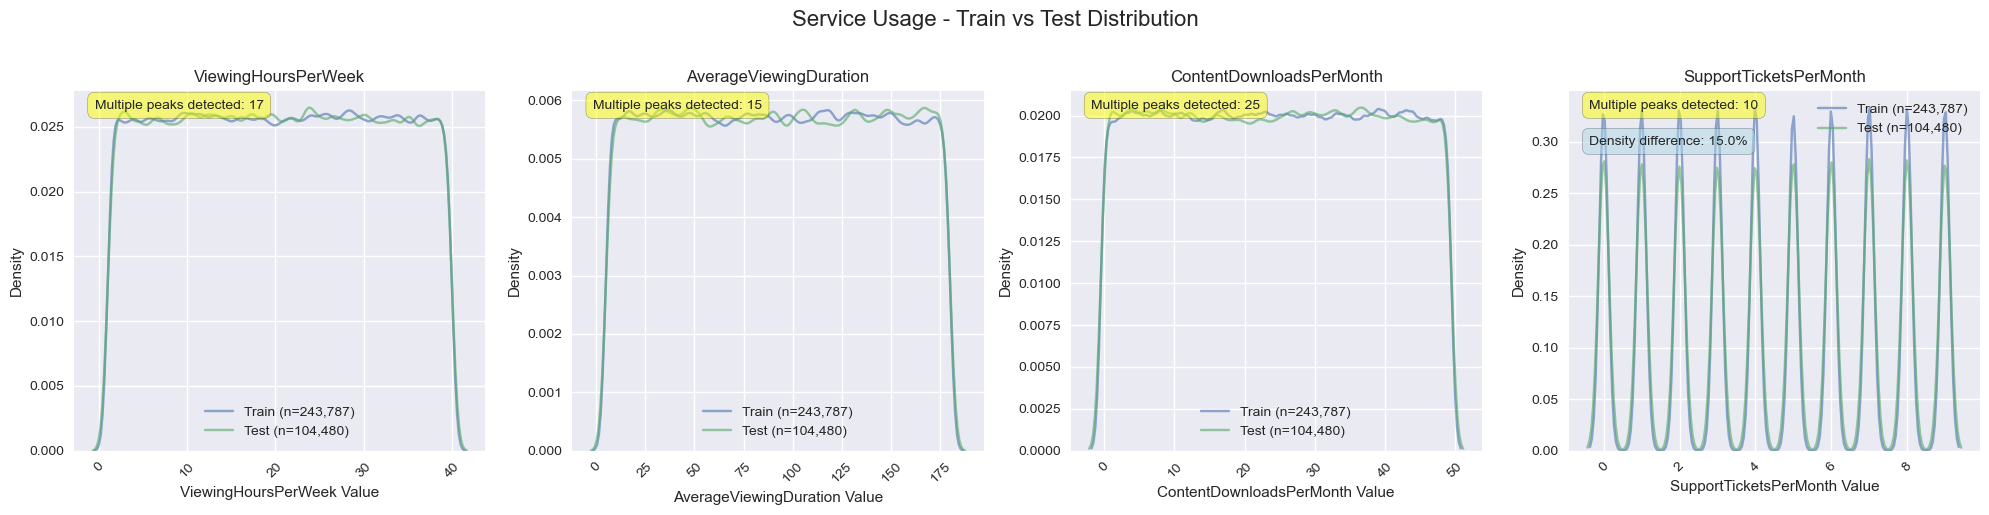


Service Usage Analysis:
----------------------------------------

ViewingHoursPerWeek Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 20.50, Median: 20.52, Mode: 1.00
    Test  - Mean: 20.49, Median: 20.47, Mode: 1.00

  Multiple modes detected at approximately:
    - 5.90
    - 10.41
    - 16.68
    - 25.50
    - 28.44
    - 33.14
    - 36.47

AverageViewingDuration Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 92.26, Median: 92.25, Mode: 5.00
    Test  - Mean: 92.65, Median: 92.53, Mode: 5.00

  Multiple modes detected at approximately:
    - 19.95
    - 36.66
    - 48.09
    - 80.63
    - 97.34
    - 116.68
    - 132.51
    - 146.58
    - 166.81

ContentDownloadsPerMonth Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 24

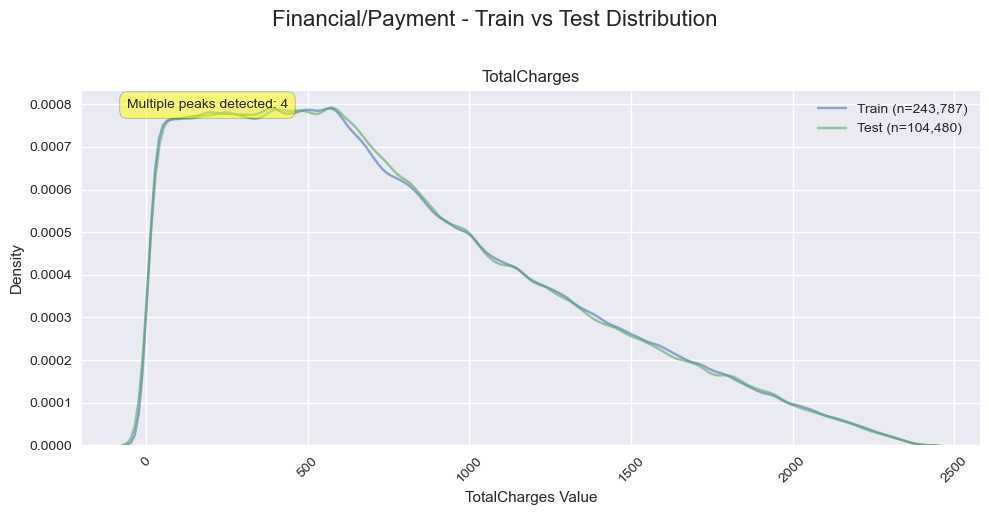


Financial/Payment Analysis:
----------------------------------------

TotalCharges Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 750.74, Median: 649.88, Mode: 4.99
    Test  - Mean: 748.17, Median: 649.39, Mode: 5.02

  Multiple modes detected at approximately:
    - 219.70
    - 398.63
    - 517.91


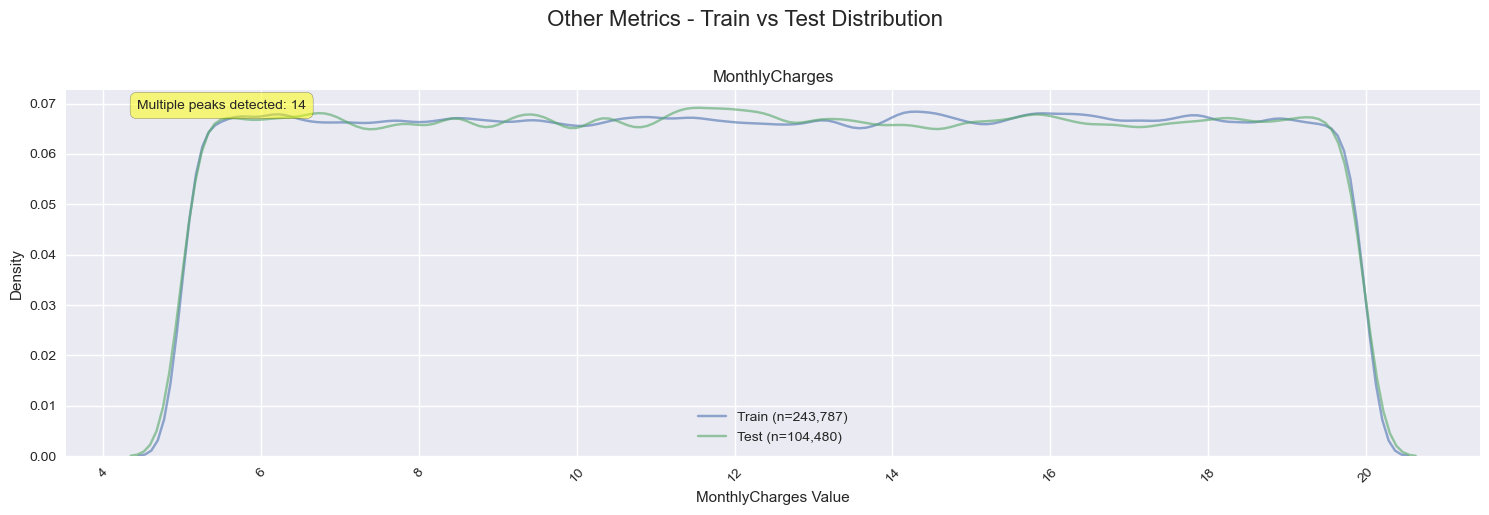


Other Metrics Analysis:
----------------------------------------

MonthlyCharges Summary:
  Sample sizes:
    Train: 243,787 samples
    Test:  104,480 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 12.49, Median: 12.50, Mode: 4.99
    Test  - Mean: 12.47, Median: 12.45, Mode: 4.99

  Multiple modes detected at approximately:
    - 6.12
    - 8.53
    - 11.10
    - 12.98
    - 14.41
    - 16.07
    - 17.80
    - 18.71

Overall Distribution Analysis Summary:
Total numerical variables analyzed: 9
Customer Demographics: 3
Service Usage: 4
Financial/Payment: 1
Other metrics: 1


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8')

def plot_distribution_comparison(train_df, test_df, metrics, title, figsize=(15, 5)):
    """Helper function to plot distribution comparisons with detailed analysis"""
    if len(metrics) > 0:
        fig = plt.figure(figsize=figsize)
        plt.suptitle(f'{title} - Train vs Test Distribution', fontsize=16, y=1.02)
        
        for i, col in enumerate(metrics, 1):
            plt.subplot(1, len(metrics), i)
            
            # Plot distributions with different bandwidths to better show multiple peaks
            sns.kdeplot(data=train_df, x=col, label='Train', alpha=0.6, bw_adjust=0.5)
            sns.kdeplot(data=test_df, x=col, label='Test', alpha=0.6, bw_adjust=0.5)
            
            # Add sample size to the legend
            plt.legend(labels=[f'Train (n={len(train_df):,})', 
                             f'Test (n={len(test_df):,})'])
            
            # Detect multiple peaks
            from scipy.signal import find_peaks
            density_train = plt.gca().lines[0].get_ydata()
            peaks_train, _ = find_peaks(density_train, height=max(density_train)*0.1)
            
            # Annotate key features
            if len(peaks_train) > 1:
                plt.annotate(f'Multiple peaks detected: {len(peaks_train)}',
                           xy=(0.05, 0.95), xycoords='axes fraction',
                           bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            
            # Calculate and show relative density difference
            max_train = max(plt.gca().lines[0].get_ydata())
            max_test = max(plt.gca().lines[1].get_ydata())
            density_diff = ((max_train - max_test) / max_train) * 100
            
            if abs(density_diff) > 10:  # If difference is more than 10%
                plt.annotate(f'Density difference: {density_diff:.1f}%',
                           xy=(0.05, 0.85), xycoords='axes fraction',
                           bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5))
            
            plt.title(f'{col}')
            plt.xlabel(f'{col} Value')
            plt.ylabel('Density')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Print detailed analysis
        print(f"\n{title} Analysis:")
        print("-" * 40)
        for col in metrics:
            train_stats = train_df[col].describe()
            test_stats = test_df[col].describe()
            
            # Calculate statistics
            train_skew = train_df[col].skew()
            test_skew = test_df[col].skew()
            train_mode = train_df[col].mode().iloc[0]
            test_mode = test_df[col].mode().iloc[0]
            
            print(f"\n{col} Summary:")
            print(f"  Sample sizes:")
            print(f"    Train: {len(train_df):,} samples")
            print(f"    Test:  {len(test_df):,} samples")
            print(f"    Ratio: {len(test_df)/len(train_df):.2%}")
            
            print(f"\n  Central Tendency:")
            print(f"    Train - Mean: {train_stats['mean']:.2f}, Median: {train_stats['50%']:.2f}, Mode: {train_mode:.2f}")
            print(f"    Test  - Mean: {test_stats['mean']:.2f}, Median: {test_stats['50%']:.2f}, Mode: {test_mode:.2f}")
            
            # Detect potential clusters/modes
            from scipy.stats import gaussian_kde
            kde_train = gaussian_kde(train_df[col].dropna())
            xs = np.linspace(train_df[col].min(), train_df[col].max(), 200)
            ys = kde_train(xs)
            peaks, _ = find_peaks(ys)
            if len(peaks) > 1:
                print(f"\n  Multiple modes detected at approximately:")
                for peak in peaks:
                    print(f"    - {xs[peak]:.2f}")

# Plot distributions for each category
plot_distribution_comparison(train_df, test_df, demographics, 
                           'Customer Demographics', figsize=(15, 5))

plot_distribution_comparison(train_df, test_df, service_usage, 
                           'Service Usage', figsize=(20, 5))

plot_distribution_comparison(train_df, test_df, financial, 
                           'Financial/Payment', figsize=(10, 5))

if len(other_metrics) > 0:
    plot_distribution_comparison(train_df, test_df, other_metrics, 
                               'Other Metrics', figsize=(15, 5))

# Print overall summary
print("\nOverall Distribution Analysis Summary:")
print("=" * 60)
print(f"Total numerical variables analyzed: {len(numerical_cols)}")
print(f"Customer Demographics: {len(demographics)}")
print(f"Service Usage: {len(service_usage)}")
print(f"Financial/Payment: {len(financial)}")
print(f"Other metrics: {len(other_metrics)}")

### Comments:
There are parameters whose mode values are so different between the train set and test set such as CustomerAge, ContentDownloadsPerMonth, etc. These need attention before building the model.
We will assess outliers using boxplot and decide what to do with Outliers, just like business, these extreme points might be worth keeping as they can be real cases and will play a good role in predicting. 

### Boxplot Analysis to detect outliers

Box Plot Analysis


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


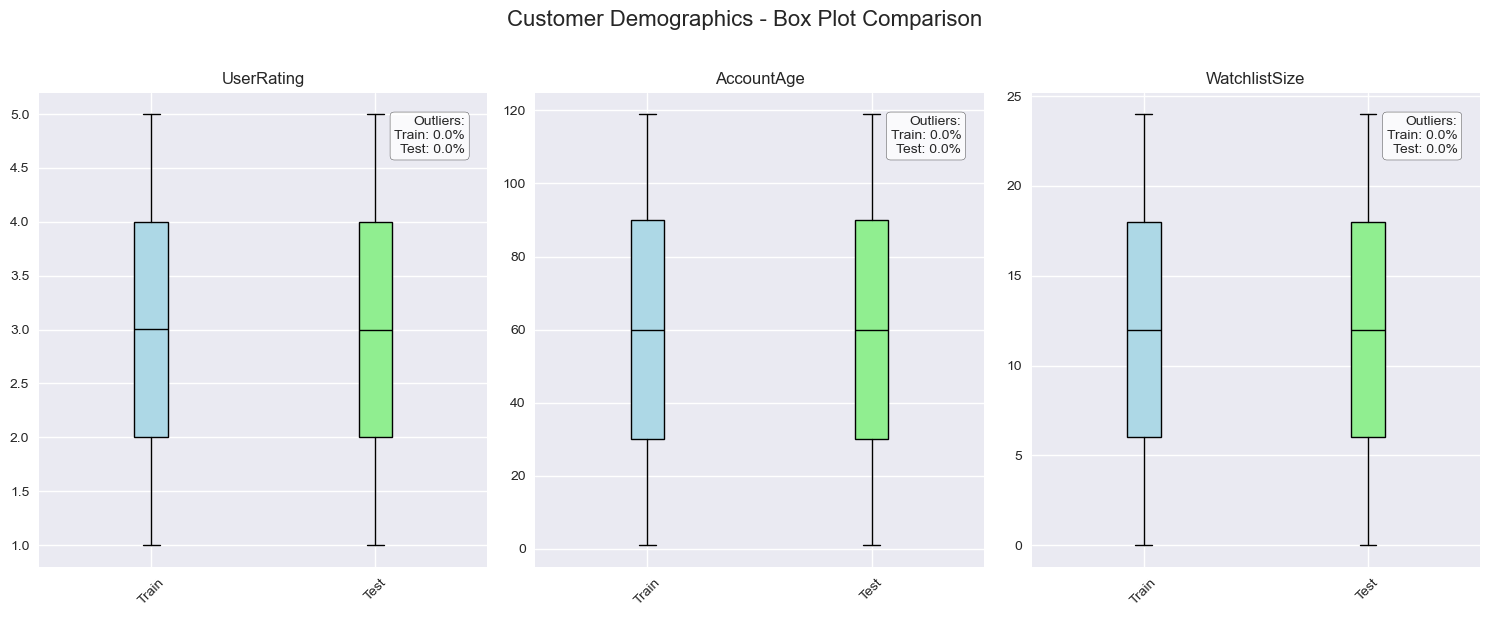


Customer Demographics - Outlier Analysis:

UserRating:
IQR Range: [2.00, 4.00]
Outlier Bounds: [-1.00, 7.00]
Actual Range - Train: [1.00, 5.00]
Actual Range - Test: [1.00, 5.00]

AccountAge:
IQR Range: [30.00, 90.00]
Outlier Bounds: [-60.00, 180.00]
Actual Range - Train: [1.00, 119.00]
Actual Range - Test: [1.00, 119.00]

WatchlistSize:
IQR Range: [6.00, 18.00]
Outlier Bounds: [-12.00, 36.00]
Actual Range - Train: [0.00, 24.00]
Actual Range - Test: [0.00, 24.00]

UserRating:
IQR Range: [2.00, 4.00]
Outlier Bounds: [-1.00, 7.00]
Actual Range - Train: [1.00, 5.00]
Actual Range - Test: [1.00, 5.00]

AccountAge:
IQR Range: [30.00, 90.00]
Outlier Bounds: [-60.00, 180.00]
Actual Range - Train: [1.00, 119.00]
Actual Range - Test: [1.00, 119.00]

WatchlistSize:
IQR Range: [6.00, 18.00]
Outlier Bounds: [-12.00, 36.00]
Actual Range - Train: [0.00, 24.00]
Actual Range - Test: [0.00, 24.00]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: Ma

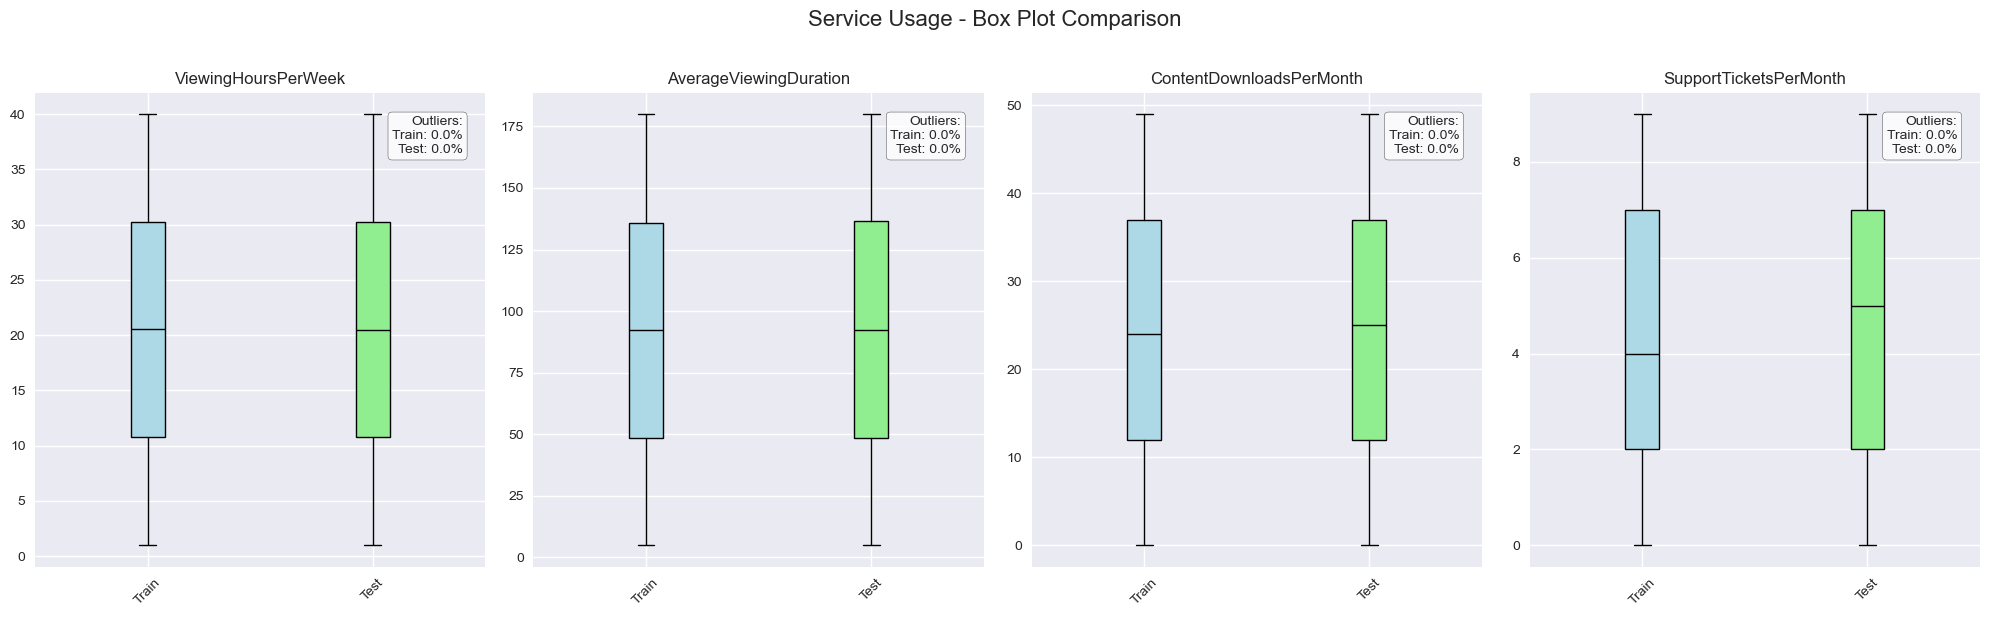


Service Usage - Outlier Analysis:

ViewingHoursPerWeek:
IQR Range: [10.76, 30.22]
Outlier Bounds: [-18.42, 59.40]
Actual Range - Train: [1.00, 40.00]
Actual Range - Test: [1.00, 40.00]

AverageViewingDuration:
IQR Range: [48.38, 135.91]
Outlier Bounds: [-82.91, 267.20]
Actual Range - Train: [5.00, 180.00]
Actual Range - Test: [5.00, 180.00]

ContentDownloadsPerMonth:
IQR Range: [12.00, 37.00]
Outlier Bounds: [-25.50, 74.50]
Actual Range - Train: [0.00, 49.00]
Actual Range - Test: [0.00, 49.00]

SupportTicketsPerMonth:
IQR Range: [2.00, 7.00]
Outlier Bounds: [-5.50, 14.50]
Actual Range - Train: [0.00, 9.00]
Actual Range - Test: [0.00, 9.00]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_31365/3158122906.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


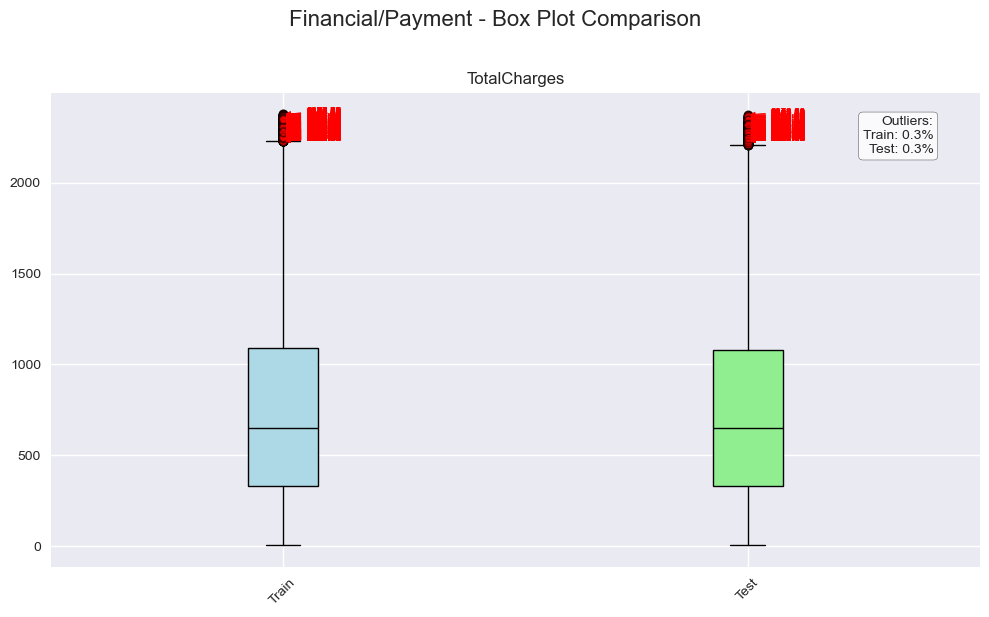


Financial/Payment - Outlier Analysis:

TotalCharges:
IQR Range: [329.15, 1089.32]
Outlier Bounds: [-811.11, 2229.57]
Actual Range - Train: [4.99, 2378.72]
Actual Range - Test: [5.02, 2376.24]


In [20]:
def plot_boxplot_comparison(train_df, test_df, metrics, title, figsize=(15, 6)):
    """Helper function to create box plots with outlier analysis and annotate outliers"""
    if len(metrics) > 0:
        fig, axes = plt.subplots(1, len(metrics), figsize=figsize)
        fig.suptitle(f'{title} - Box Plot Comparison', fontsize=16, y=1.02)

        if len(metrics) == 1:
            axes = [axes]

        for ax, col in zip(axes, metrics):
            # Prepare data for box plot
            data = [train_df[col], test_df[col]]

            # Create box plot
            bplot = ax.boxplot(data, labels=['Train', 'Test'], 
                             patch_artist=True,
                             medianprops=dict(color="black"),
                             flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))

            # Calculate outlier percentages
            q1_train = train_df[col].quantile(0.25)
            q3_train = train_df[col].quantile(0.75)
            iqr_train = q3_train - q1_train
            lower_bound = q1_train - 1.5 * iqr_train
            upper_bound = q3_train + 1.5 * iqr_train

            outliers_train = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
            outliers_test = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)][col]

            # Add outlier information
            outlier_text = f'Outliers:\nTrain: {len(outliers_train)/len(train_df):.1%}\nTest: {len(outliers_test)/len(test_df):.1%}'
            ax.text(0.95, 0.95, outlier_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            # Annotate outlier values for train
            for y in outliers_train:
                ax.annotate(f'{y:.2f}', xy=(1, y), xytext=(1.05, y), textcoords='data', fontsize=7, color='red', arrowprops=dict(arrowstyle='->', lw=0.5, color='red'))
            # Annotate outlier values for test
            for y in outliers_test:
                ax.annotate(f'{y:.2f}', xy=(2, y), xytext=(2.05, y), textcoords='data', fontsize=7, color='red', arrowprops=dict(arrowstyle='->', lw=0.5, color='red'))

            # Customize box colors
            bplot['boxes'][0].set_facecolor('lightblue')
            bplot['boxes'][1].set_facecolor('lightgreen')

            ax.set_title(f'{col}')
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        # Print detailed statistics
        print(f"\n{title} - Outlier Analysis:")
        print("=" * 60)
        for col in metrics:
            q1 = train_df[col].quantile(0.25)
            q3 = train_df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            print(f"\n{col}:")
            print(f"IQR Range: [{q1:.2f}, {q3:.2f}]")
            print(f"Outlier Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"Actual Range - Train: [{train_df[col].min():.2f}, {train_df[col].max():.2f}]")
            print(f"Actual Range - Test: [{test_df[col].min():.2f}, {test_df[col].max():.2f}]")

# Example usage for your dataset:
print("Box Plot Analysis")
print("=" * 60)

# Example metric lists for demonstration (replace with your actual columns)
demographics = ['Age', 'UserRating', 'AccountAge', 'WatchlistSize']
service_usage = ['ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth']
financial = ['TotalCharges']

# Only include columns that exist in your data
demographics = [col for col in demographics if col in train_df.columns and col in test_df.columns]
service_usage = [col for col in service_usage if col in train_df.columns and col in test_df.columns]
financial = [col for col in financial if col in train_df.columns and col in test_df.columns]

if demographics:
    plot_boxplot_comparison(train_df, test_df, demographics, 'Customer Demographics', figsize=(15, 6))
if service_usage:
    plot_boxplot_comparison(train_df, test_df, service_usage, 'Service Usage', figsize=(20, 6))
if financial:
    plot_boxplot_comparison(train_df, test_df, financial, 'Financial/Payment', figsize=(10, 6))

### Outlier and data distribution analyis summary
1. **SupportTicketPerMonth shows difference between train and test sets**
        * This variable in the test set has a higher median, skwed towards the upper ranage while its train set is opposite. 

2. **Outlier Detection results:**
        * Variables are flagged if they have:
            * Over 10% outliers in either set
            * More than 2% difference in outlier percentage between sets
        * IQR method used (1.5 * IQR beyond Q1/Q3)
        * Both extreme high and low values considered

3. **Treatment Recommendations:**
        * For varianles with higher outlier percentages: --> use robust scaling and transformation
        * For distribution differences: use stratified sampling, or special handling
        * NumCreditLines: binning or categorical transformation


### Planning to handle outliers
1. Using Robust Scaling: This method nornalised value to the IQR, which is less sentivve to the Outliers, the values will be centred around 0 and the scale is IQR unit. The shape if distribution is retained but the outliers are compressed. Wee will applied this to 

### Data Preprocessing Procedures (Record)

Below is a summary of the preprocessing steps applied before modeling:

1. **Missing Value Handling:**
   - Checked for missing values in both train and test datasets. No missing values found.

2. **Categorical Variable Encoding:**
   - Converted categorical variables (SubscriptionType, PaymentMethod, ContentType, DeviceRegistered, GenrePreference, Gender) to dummy/one-hot encoded variables.

3. **Boolean Variable Conversion:**
   - Converted boolean columns (PaperlessBilling, MultiDeviceAccess, ParentalControl, SubtitlesEnabled) from 'Yes'/'No' to 1/0.

4. **Numerical Feature Scaling:**
   - Robust scaling considered for numerical variables with outliers (e.g., TotalCharges, ViewingHoursPerWeek, ContentDownloadsPerMonth, AverageViewingDuration).

5. **Log Transformation:**
   - Applied log1p (log(x+1)) transformation to `SupportTicketPerMonth` to reduce skewness and handle outliers.

6. **Feature Selection:**
   - Selected top features using SelectKBest and correlation analysis.

7. **Data Alignment:**
   - Ensured train and test sets have the same columns and order after preprocessing.

8. **Target Variable:**
   - Used `Churn` as the target variable for modeling.

The following code cell applies the log transformation to `SupportTicketPerMonth`.

In [ ]:
# Apply log1p transformation to SupportTicketPerMonth in both train and test sets
if 'SupportTicketPerMonth' in train_df.columns and 'SupportTicketPerMonth' in test_df.columns:
    train_df['SupportTicketPerMonth_log'] = np.log1p(train_df['SupportTicketPerMonth'])
    test_df['SupportTicketPerMonth_log'] = np.log1p(test_df['SupportTicketPerMonth'])
    print('Log transformation applied to SupportTicketPerMonth.')
else:
    print('SupportTicketPerMonth column not found in both datasets.')

In [ ]:
# Visualize the effect of log transform on SupportTicketPerMonth
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_df['SupportTicketPerMonth'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original SupportTicketPerMonth')
sns.histplot(train_df['SupportTicketPerMonth_log'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Log-Transformed SupportTicketPerMonth')
plt.tight_layout()
plt.show()

# Remove original SupportTicketPerMonth from feature sets and use the log-transformed version
for df in [train_df, test_df]:
    if 'SupportTicketPerMonth' in df.columns:
        df.drop('SupportTicketPerMonth', axis=1, inplace=True)
    # Ensure the log version is included in feature engineering steps

In [62]:
# df_booleans_test = test_df[booleans]
df_booleans_train = train_df.loc[:, ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']]
df_booleans_test = test_df.loc[:, ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']]
print(df_booleans_train.describe(),'\n')
print(df_booleans_test.describe())
        

       PaperlessBilling MultiDeviceAccess ParentalControl SubtitlesEnabled
count            243787            243787          243787           243787
unique                2                 2               2                2
top                  No                No             Yes              Yes
freq             121980            122035          122085           122180 

       PaperlessBilling MultiDeviceAccess ParentalControl SubtitlesEnabled
count            104480            104480          104480           104480
unique                2                 2               2                2
top                  No               Yes              No              Yes
freq              52564             52387           52520            52259


In [63]:
def convert_yes_no_to_int(df):
    # Only select columns with object/string type (likely to have 'Yes'/'No')
    for col in df.select_dtypes(include=['object', 'category']):
        df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
    return df
convert_yes_no_to_int(df_booleans_train)
convert_yes_no_to_int(df_booleans_test)

,PaperlessBilling,MultiDeviceAccess,ParentalControl,SubtitlesEnabled
0,0,0,0,0
1,1,0,1,0
2,0,1,0,1
3,0,1,1,1
4,1,1,0,0
...,...,...,...,...
104475,0,1,0,1
104476,1,1,1,0
104477,0,1,0,1
104478,0,1,1,0


In [64]:
df_booleans_train.dtypes
df_booleans_test.dtypes

PaperlessBilling     int64
MultiDeviceAccess    int64
ParentalControl      int64
SubtitlesEnabled     int64
dtype: object

In [65]:
df_booleans_test.dtypes

PaperlessBilling     int64
MultiDeviceAccess    int64
ParentalControl      int64
SubtitlesEnabled     int64
dtype: object

In [66]:
numerical_columns_train = train_df.select_dtypes(include=['number']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_train = train_df[numerical_columns_train]
print(df_num_train .shape)

numerical_columns_test = test_df.select_dtypes(include=['number']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_test = test_df[numerical_columns_test]
print(df_num_test .shape)


(243787, 10)
(104480, 9)


In [67]:
# Define the columns to select
columns = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference', 'Gender']

# Select the specified columns from the DataFrames
df_obj_test = test_df.loc[:, columns]
df_obj_train = train_df.loc[:, columns]

# Create dummy variables for the specified columns
df_obj_test = pd.get_dummies(df_obj_test, columns=columns, drop_first=True)
df_obj_train = pd.get_dummies(df_obj_train, columns=columns, drop_first=True)

# Display the first few rows of the new DataFrames
print(df_obj_test.head())
print(df_obj_train.head())

   SubscriptionType_Premium  SubscriptionType_Standard  \
0                      True                      False   
1                     False                      False   
2                     False                       True   
3                     False                       True   
4                     False                       True   

   PaymentMethod_Credit card  PaymentMethod_Electronic check  \
0                      False                           False   
1                      False                            True   
2                      False                           False   
3                      False                            True   
4                       True                           False   

   PaymentMethod_Mailed check  ...  GenrePreference_Comedy  \
0                        True  ...                    True   
1                       False  ...                   False   
2                       False  ...                   False   
3                 

In [68]:
Z_train= pd.concat([df_obj_train, df_num_train, df_booleans_train], axis=1)
Z_train.shape

(243787, 29)

In [69]:
Z_test=pd.concat([df_obj_test, df_num_test, df_booleans_test], axis=1)
Z_test.shape

(104480, 28)

In [70]:
# Add all necessary imports at the top
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Ensure both datasets have the same columns
if 'Churn' in Z_train.columns:
    Z_train = Z_train.drop('Churn', axis=1)

# Make sure columns are in the same order
common_columns = Z_train.columns.tolist()
Z_train = Z_train[common_columns]
Z_test = Z_test[common_columns]

Y=train_df['Churn']


In [81]:
### Train model
model = RandomForestRegressor(random_state=42)
model.fit(Z_train, Y)

# Make Predictions
y_pred_proba = model.predict(Z_test)

# Create final dataframe with CustomerID and predictions
prediction_df = pd.DataFrame({
    'CustomerID': Z_test.index,  # Assuming CustomerID is the index
    'predicted_probability': y_pred_proba
})

# If CustomerID is a column instead of index, use this:
# predictions_df = pd.DataFrame({
#     'CustomerID': Z_test['CustomerID'],
#     'ChurnProbability': y_pred_proba
# })

# Format the dataframe
prediction_df = prediction_df[['CustomerID', 'predicted_probability']]  # Ensure column order

prediction_df.to_csv(filename, index=False)

# Display first few rows of predictions
print("\nFirst few rows of prediction:")
print(prediction_df.head())

# Display shape of final dataframe
print("\nShape of prediction dataframe:", prediction_df.shape)


First few rows of prediction:
   CustomerID  predicted_probability
0           0                   0.22
1           1                   0.02
2           2                   0.48
3           3                   0.09
4           4                   0.16

Shape of prediction dataframe: (104480, 2)


In [36]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features
selector = SelectKBest(score_func=f_regression, k=10)
Z_train_selected = selector.fit_transform(Z_train, Y)
Z_test_selected = selector.transform(Z_test)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

In [37]:
from tkinter.tix import ROW
from numpy import cross
from sklearn.linear_model import LinearRegression

# Concatenate df_obj_train and df_num_train to create Z_train
Z_train = pd.concat([df_obj_train, df_num_train, df_booleans_train], axis=1)
Y=train_df["Churn"]
lm = LinearRegression()

# Fit the model using Z_train and Y
lm.fit(Z_train, Y)

# Print the score of the model
print("Model score on training data:", lm.score(Z_train, Y))

# Predict using Z_train
Y_hat_Z = lm.predict(Z_train)

# Optionally, you can print the predictions
print("Predictions:", Y)
# Evaluate with cross-validated ROC AUC using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

clf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(clf, Z_train, Y, cv=skf, scoring='roc_auc')
print(f'Cross-validated ROC AUC scores: {auc_scores}')
print(f'Mean ROC AUC: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}')

Model score on training data: 1.0
Predictions: 0         0
1         0
2         0
3         0
4         0
         ..
243782    0
243783    0
243784    0
243785    0
243786    0
Name: Churn, Length: 243787, dtype: int64
Cross-validated ROC AUC scores: [1. 1. 1. 1. 1.]
Mean ROC AUC: 1.0000 ± 0.0000


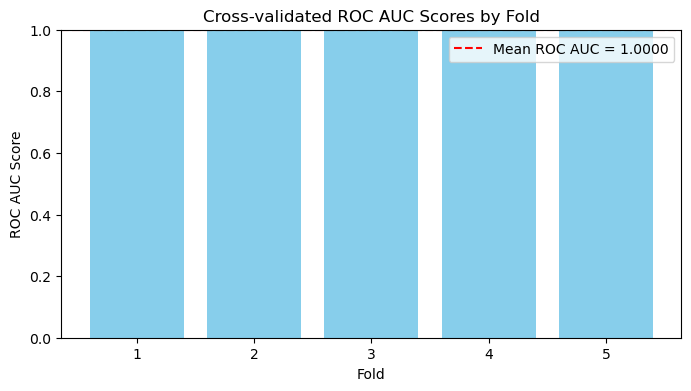

In [30]:
# Visualize the cross-validated ROC AUC scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(auc_scores) + 1), auc_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('ROC AUC Score')
plt.title('Cross-validated ROC AUC Scores by Fold')
plt.ylim(0.0, 1.0)
plt.axhline(auc_scores.mean(), color='red', linestyle='--', label=f'Mean ROC AUC = {auc_scores.mean():.4f}')
plt.legend()
plt.show()

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [51]:
# Fit a dummy classifier on the feature columns in train_df

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

# Create an empty DataFrame for predictions
columns = ['CustomerID', 'predicted_probability']
prediction_df = pd.DataFrame(columns=columns)

# Make predictions on the test set
predicted_probability = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]


# Add CustomerID and predicted probabilities to the prediction_df
prediction_df['CustomerID'] = test_df['CustomerID']
prediction_df['predicted_probability'] = predicted_probability



Churn                             1.000000
MonthlyCharges                    0.100473
SupportTicketsPerMonth            0.084064
UserRating                        0.022124
WatchlistSize                     0.021739
PaymentMethod_Electronic check    0.016913
GenrePreference_Comedy            0.015876
PaymentMethod_Mailed check        0.014441
GenrePreference_Sci-Fi            0.013183
Gender_Male                       0.007467
SubscriptionType_Standard         0.005692
DeviceRegistered_Mobile           0.001708
DeviceRegistered_Tablet           0.001374
PaperlessBilling                 -0.000923
MultiDeviceAccess                -0.001285
DeviceRegistered_TV              -0.003267
GenrePreference_Drama            -0.003274
ParentalControl                  -0.005531
GenrePreference_Fantasy          -0.005853
ContentType_Movies               -0.006345
ContentType_TV Shows             -0.007029
SubtitlesEnabled                 -0.012372
PaymentMethod_Credit card        -0.028441
Subscriptio

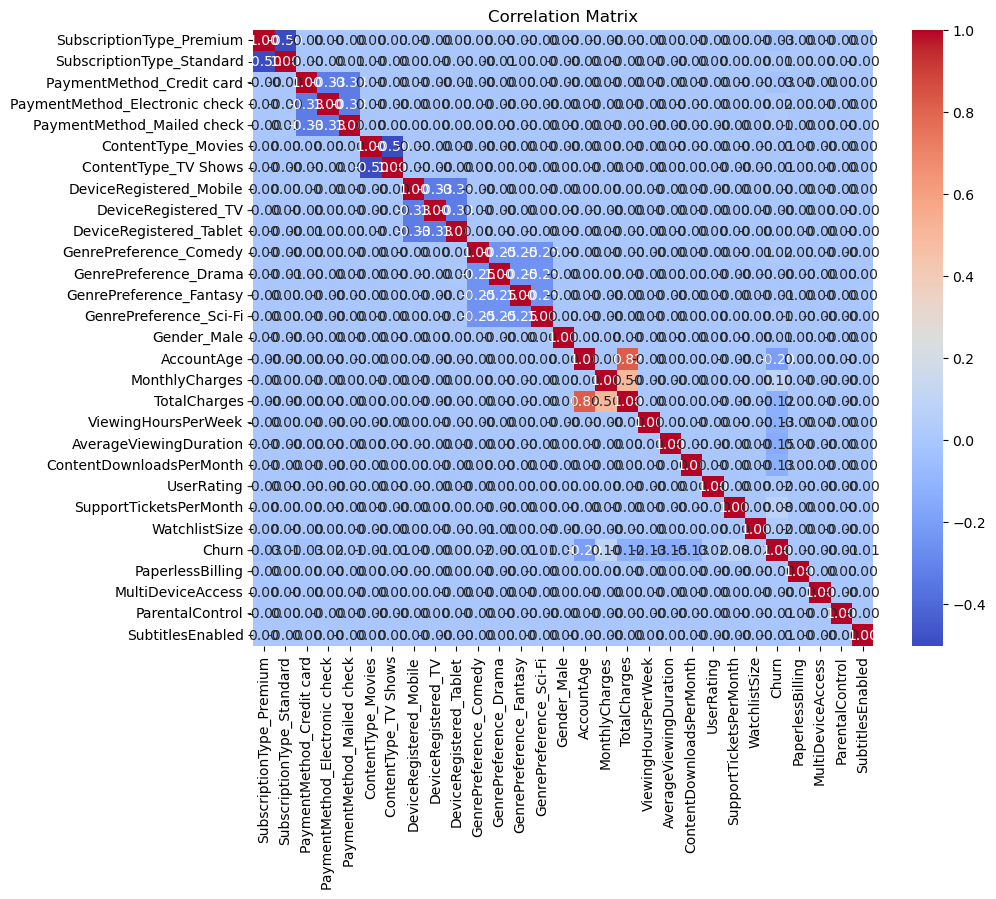

In [24]:


# Calculate the correlation matrix
correlation_matrix = Z_train.corr()

# Extract the correlation of features with the 'Churn' variable
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Display the correlation values
print(churn_correlation)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The positive coefficient of the correlation indicates more likelihood for a churn than a negative value in this analysis.
* Factor like age has a strong influence on the churn risk, the old the customers, the less likely they will churn
* Other parameters also help  decide like conten downloads per month, subscription of premium and total charges, the higher the subscription the less likey to churn, and paying by a credit card is also good sign of staying. So, from this table, we can keep strong influence variables, in both directions, and the cut off point is I chose, 3rd and 1 quartiles.
* 
ParentalControl                  -0.005531
GenrePreference_Fantasy          -0.005853
ContentType_Movies               -0.006345
ContentType_TV Shows             -0.007029
SubtitlesEnabled                 -0.012372
PaymentMethod_Credit card        -0.028441
SubscriptionType_Premium         -0.033741
TotalCharges                     -0.120529
ViewingHoursPerWeek              -0.128645
ContentDownloadsPerMonth         -0.129752
AverageViewingDuration           -0.146897
AccountAge                       -0.197736

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
#FINAL TEST CELLS - please make sure all of your code is above these test cells
#Writing to csv for autograding purposes
# Add CustomerID and predicted probabilities to the prediction_df
# Ensure both DataFrames have the same number of rows and aligned order
assert len(prediction_df) == len(test_df), "DataFrames must have the same length"

# Replace the CustomerID column in prediction_df with the one from test_df
prediction_df['CustomerID'] = test_df['CustomerID'].values
prediction_df['predicted_probability'] = predicted_probability
#Write to csv
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [88]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!